In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os 
sys.path.append("../../")

from data_loading import load_runs

### Signal channels

In [3]:
# RUN = ["1","2","3","4b","4c","4d","5"]
RUN = ["1", "2", "3_nocrt", "3_crt", "4b","4c","4d","5"]
# RUN = ["5"]
signal_rundata, signal_mc_weights, signal_data_pot = load_runs(
    RUN,
    data="bnb",  # which data to load
    # truth_filtered_sets=["nue", "drt", "nc_pi0", "cc_pi0", "cc_nopi", "cc_cpi", "nc_nopi", "nc_cpi"],
    # Which truth-filtered MC sets to load in addition to the main MC set. At least nu_e and dirt
    # are highly recommended because the statistics at the final level of the selection are very low.
    truth_filtered_sets=["nue", "drt"],
    # Choose which additional variables to load. Which ones are required may depend on the selection
    # you wish to apply.
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=True,
    load_crt_vars=True,
    # Load the nu_e set one more time with the LEE weights applied
    load_lee=False,
    # With the cache enabled, by default the loaded dataframes will be stored as HDF5 files
    # in the 'cached_dataframes' folder. This will speed up subsequent loading of the same data.
    enable_cache=True,
    blinded=False,
    use_new_signal_model=False,
)

Loading run 1
Loading run 2
Loading run 3_nocrt
Loading run 3_crt
Loading run 4b
Loading run 4c
Loading run 4d
Loading run 5


In [4]:
from microfit.histogram import Binning, MultiChannelBinning

binning_def = ("reco_e", 17, (0.01, 2.39), r"Reconstructed Energy [GeV]")
binning_np_ext = Binning.from_config(*binning_def)
binning_np_ext.set_selection(preselection="NP", selection="NPBDT")
binning_np_ext.label = "NPBDT"

binning_zp_ext = Binning.from_config(*binning_def)
binning_zp_ext.set_selection(preselection="ZP", selection="ZPBDT_CRT")
binning_zp_ext.label = "ZPBDT"

binning_zp_ext_nocrt = Binning.from_config(*binning_def)
binning_zp_ext_nocrt.set_selection(preselection="ZP", selection="ZPBDT")
binning_zp_ext_nocrt.label = "ZPBDT_NOCRT"

signal_binning = MultiChannelBinning([binning_np_ext, binning_zp_ext, binning_zp_ext_nocrt])

In [5]:
from microfit.fileio import from_json
from microfit.histogram import RunHistGenerator

detsys_data_path = "/nashome/a/atrettin/PELEE/old_model_ana_ext_bin_range_output/detvar_cache/run_123_nocrt3_crt4b4c4d5_NPBDT_ZPBDT_ZPBDT_NOCRT_bnb_(mcf_pass_ncpi0_eqeq_1_or_(abs(nu_pdg)_eqeq_12_and_ccnc_eqeq_0)).json"

signal_generator = RunHistGenerator(
    signal_rundata,
    signal_binning,
    data_pot=signal_data_pot,
    detvar_data=from_json(detsys_data_path),
)

../../microfit/run_plotter.py:127: UserWarning: No signal category found in the MC hists. Not separating signal.
  warnings.warn("No signal category found in the MC hists. Not separating signal.")


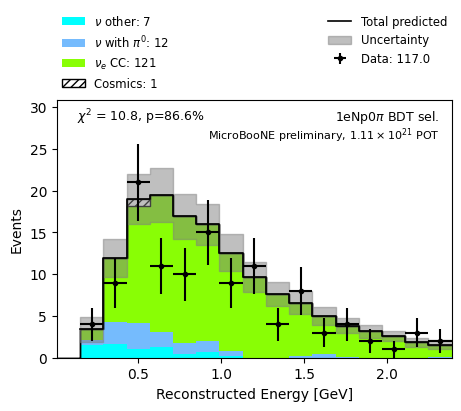

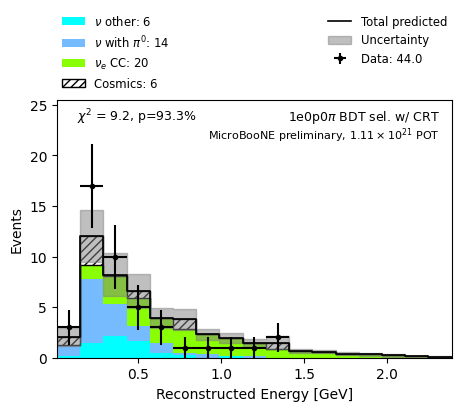

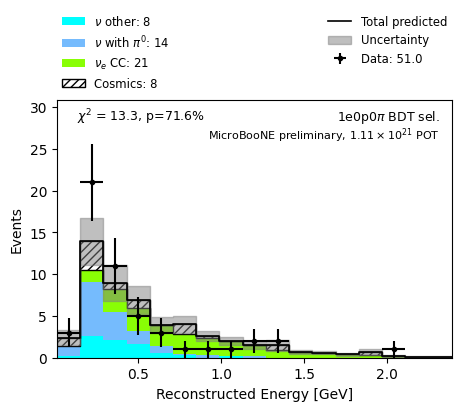

In [6]:
from matplotlib import pyplot as plt
from microfit.run_plotter import RunHistPlotter

for channel in signal_generator.channels:
    fig, ax = plt.subplots(figsize=(4.5, 4), constrained_layout=True)
    ax = RunHistPlotter(signal_generator).plot(
        category_column="paper_category", 
        include_multisim_errors=True,
        show_chi_square=True,
        show_data_mc_ratio=False,
        add_ext_error_floor=False,
        add_precomputed_detsys=True,
        ax=ax,
        channel=channel,
        legend_cols=2
    )
    # fig.savefig(f"new_signal_ana_plots/{channel}.pdf")

### NC $\pi^0$ sideband

In [7]:
ncpi0_data, ncpi0_mc_weights, ncpi0_data_pot = load_runs(
    run_numbers = ["3_crt", "4b", "4c", "4d","5"],
    data = "bnb",
    truth_filtered_sets = ["nue", "drt"],
    loadpi0variables = True,
    loadshowervariables = True,
    loadrecoveryvars = False,
    loadsystematics = True,
    load_crt_vars = True,
    load_lee = False,
    enable_cache = True,
    blinded = False,
    overwrite=False
)

Loading run 3_crt
Loading run 4b
Loading run 4c
Loading run 4d
Loading run 5


In [8]:
ncpi0_binning = Binning.from_config("reco_e", 10, (0.15, 1.0), "Reconstructed neutrino energy (GeV)")
ncpi0_binning.set_selection("ZPLOOSESELTWOSHR", "ZPTwoShrCRT")
ncpi0_binning.label = "TWOSHR"
ncpi0_binning.variable_tex = "Reconstructed neutrino energy (GeV)"
ncpi0_binning.variable_tex_short = "$E_{\\mathrm{reco}}$"
ncpi0_binning.selection_tex = "NC $\\pi^0$ sel."
ncpi0_binning.selection_tex_short = "NC $\\pi^0$"

In [9]:
from microfit.fileio import from_json
detvar_data_path = "/nashome/a/atrettin/PELEE/old_model_ana_ext_bin_range_output/detvar_cache/run_3_crt4b4c4d5_TWOSHR_bnb.json"

ncpi0_generator = RunHistGenerator(
    ncpi0_data,
    MultiChannelBinning([ncpi0_binning]),
    data_pot=ncpi0_data_pot,
    detvar_data=from_json(detvar_data_path),
)

(<AxesSubplot:xlabel='Global bin number', ylabel='Events'>, None)

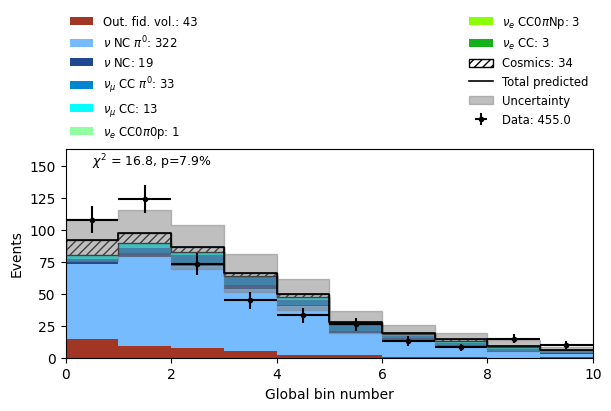

In [10]:
RunHistPlotter(ncpi0_generator).plot(
    category_column="category",
    include_multisim_errors=True,
    show_chi_square=True,
    show_data_mc_ratio=False,
    add_ext_error_floor=False,
    add_precomputed_detsys=True,
    legend_cols=2
)

### Muon neutrino sideband

In [11]:
muon_data, muon_mc_weights, muon_data_pot = load_runs(
    run_numbers = ["3_crt", "4b", "4c", "4d","5"],
    data = "bnb",
    truth_filtered_sets = ["nue", "drt"],
    loadshowervariables = False,
    loadsystematics = True,
    use_bdt = False,
    loadnumuvariables = True,
    load_crt_vars = True,
    numupresel = True,
    enable_cache = True,
    blinded = False,
    overwrite=False
)

Loading run 3_crt


Loading run 4b
Loading run 4c
Loading run 4d
Loading run 5


In [12]:
binning_def = ("neutrino_energy", 14, (0.15, 1.55), "Reconstructed neutrino energy (GeV)")
numu_np_binning = Binning.from_config(*binning_def)
numu_np_binning.set_selection(preselection="NUMUCRT", selection="NUMUCRTNP0PI")
numu_np_binning.label = "NUMUCRTNP0PI"

numu_zp_binning = Binning.from_config(*binning_def)
numu_zp_binning.set_selection(preselection="NUMUCRT", selection="NUMUCRT0P0PI")
numu_zp_binning.label = "NUMUCRT0P0PI"

numu_crt_binning = Binning.from_config(*binning_def)
numu_crt_binning.set_selection(preselection="NUMUCRT", selection="NUMUCRT")
numu_crt_binning.label = "NUMUCRT"

numu_binning = MultiChannelBinning([numu_np_binning, numu_zp_binning, numu_crt_binning])

In [13]:
detvar_data_path = "/nashome/a/atrettin/PELEE/old_model_ana_ext_bin_range_output/detvar_cache/run_3_crt4b4c4d5_NUMUCRTNP0PI_NUMUCRT0P0PI_NUMUCRT_bnb.json"

numu_generator = RunHistGenerator(
    muon_data,
    numu_binning,
    data_pot=muon_data_pot,
    detvar_data=from_json(detvar_data_path),
)

(<AxesSubplot:xlabel='Reconstructed neutrino energy (GeV)', ylabel='Events'>,
 None)

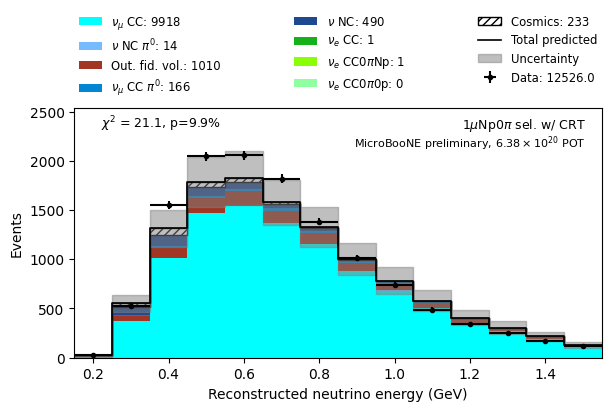

In [14]:
RunHistPlotter(numu_generator).plot(
    category_column="category",
    include_multisim_errors=True,
    show_chi_square=True,
    show_data_mc_ratio=False,
    add_ext_error_floor=False,
    add_precomputed_detsys=True,
    legend_cols=3,
    channel="NUMUCRTNP0PI"
)

(<AxesSubplot:xlabel='Reconstructed neutrino energy (GeV)', ylabel='Events'>,
 None)

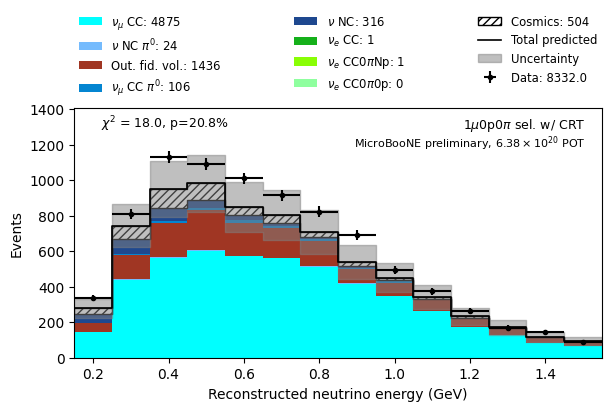

In [15]:
RunHistPlotter(numu_generator).plot(
    category_column="category",
    include_multisim_errors=True,
    show_chi_square=True,
    show_data_mc_ratio=False,
    add_ext_error_floor=False,
    add_precomputed_detsys=True,
    legend_cols=3,
    channel="NUMUCRT0P0PI"
)

In [16]:
from microfit.histogram import HistogramGenerator

signal_channels = ["NPBDT", "ZPBDT"]
sideband_channels = ["TWOSHR", "NUMUCRTNP0PI", "NUMUCRT0P0PI"]

hist_generators = [r.get_hist_generator(which="mc") for r in [signal_generator, ncpi0_generator, numu_generator]]
data_generators = [r.get_hist_generator(which="data") for r in [signal_generator, ncpi0_generator, numu_generator]]
ext_generators = [r.get_hist_generator(which="ext") for r in [signal_generator, ncpi0_generator, numu_generator]]

joint_histogram_tuned_genie = HistogramGenerator.generate_joint_histogram(hist_generators, include_multisim_errors=True, add_precomputed_detsys=True)
joint_histogram_tuned_genie = joint_histogram_tuned_genie[signal_channels + sideband_channels]

joint_histogram_ext = HistogramGenerator.generate_joint_histogram(ext_generators, include_multisim_errors=False)
joint_histogram_ext = joint_histogram_ext[signal_channels + sideband_channels]

joint_total_prediction = joint_histogram_tuned_genie + joint_histogram_ext

joint_data_histogram = HistogramGenerator.generate_joint_histogram(data_generators, include_multisim_errors=False)
joint_data_histogram = joint_data_histogram[signal_channels + sideband_channels]

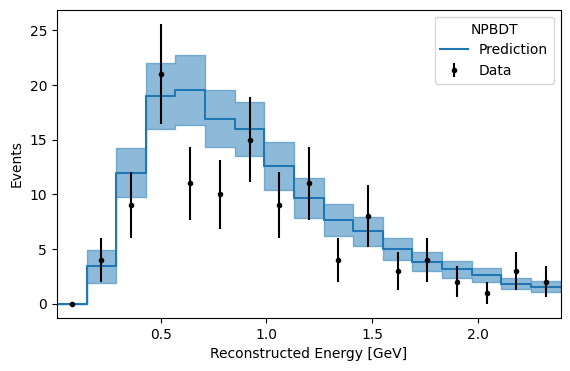

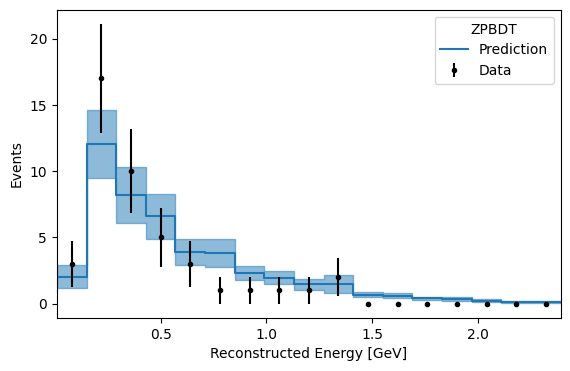

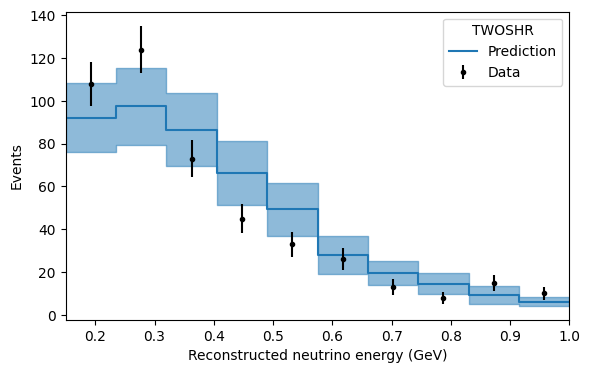

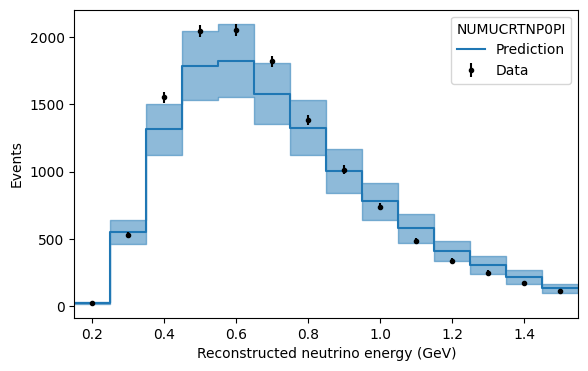

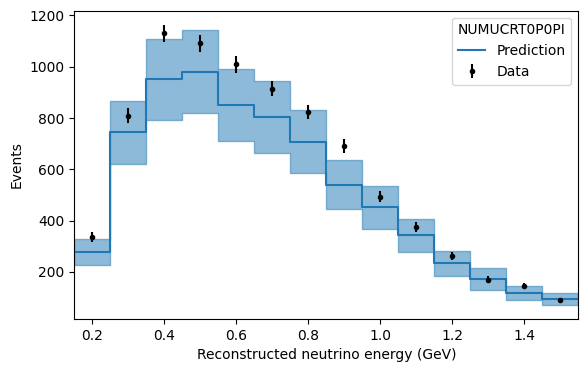

In [17]:
for channel in signal_channels + sideband_channels:
    fig, ax = plt.subplots(figsize=(6.5, 4))
    joint_total_prediction[channel].draw(ax=ax, label="Prediction")
    joint_data_histogram[channel].draw(ax=ax, label="Data", as_errorbars=True, color="k")
    ax.legend(title=channel)
plt.show()

<AxesSubplot:title={'center':'Correlation matrix'}>

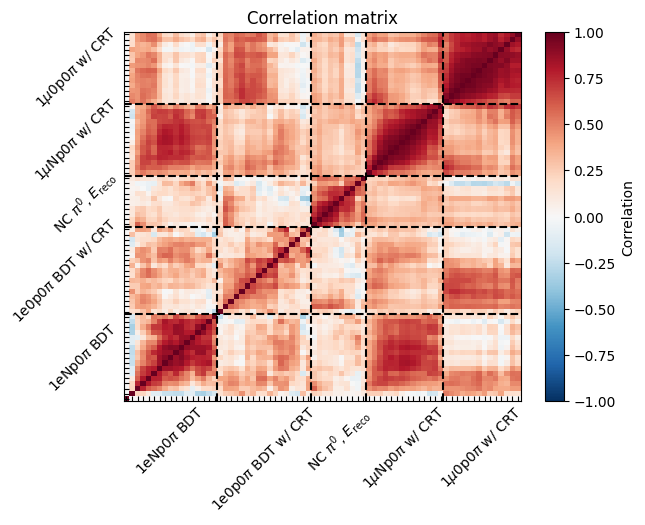

In [18]:
joint_histogram_tuned_genie.draw_covariance_matrix()

In [19]:
joint_histogram_tuned_genie_constrained = joint_histogram_tuned_genie.update_with_measurement(
    joint_data_histogram[sideband_channels], central_value=joint_total_prediction
)
joint_total_prediction_constrained = joint_total_prediction.update_with_measurement(
    joint_data_histogram[sideband_channels], central_value=joint_total_prediction
)

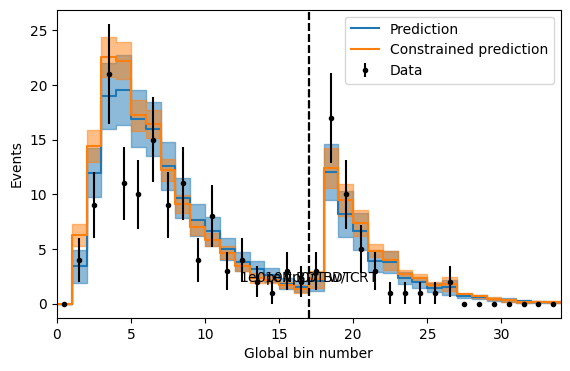

In [20]:
fig, ax = plt.subplots(figsize=(6.5, 4))

joint_total_prediction[signal_channels].draw(ax=ax, label="Prediction", show_channel_labels=False)
joint_total_prediction_constrained.draw(ax=ax, label="Constrained prediction", show_channel_labels=False)
joint_data_histogram[signal_channels].draw(ax=ax, label="Data", as_errorbars=True, color="k")

ax.legend()

In [21]:
muon_data["mc"][["weights", "weights_no_tune"]]

,weights,weights_no_tune
entry,,
0,0.164275,0.164275
1,0.164275,0.164275
2,0.164275,0.164275
3,0.164275,0.164275
4,0.164275,0.164275
...,...,...
209022,0.144130,0.144130
209023,0.144130,0.144130
209024,0.182086,0.144130


In [22]:
for key in signal_rundata:
    if key in ["data", "ext"]:
        continue
    signal_rundata[key]["weights"] = signal_rundata[key]["weights_no_tune"]

for key in ncpi0_data:
    if key in ["data", "ext"]:
        continue
    ncpi0_data[key]["weights"] = ncpi0_data[key]["weights_no_tune"]

for key in muon_data:
    if key in ["data", "ext"]:
        continue
    muon_data[key]["weights"] = muon_data[key]["weights_no_tune"]

In [23]:
signal_generator = RunHistGenerator(
    signal_rundata,
    signal_binning,
    data_pot=signal_data_pot,
    # detvar_data=from_json(detsys_data_path),
)
ncpi0_generator = RunHistGenerator(
    ncpi0_data,
    MultiChannelBinning([ncpi0_binning]),
    data_pot=ncpi0_data_pot,
    # detvar_data=from_json(detvar_data_path),
)
muon_generator = RunHistGenerator(
    muon_data,
    numu_binning,
    data_pot=muon_data_pot,
    # detvar_data=from_json(detvar_data_path),
)

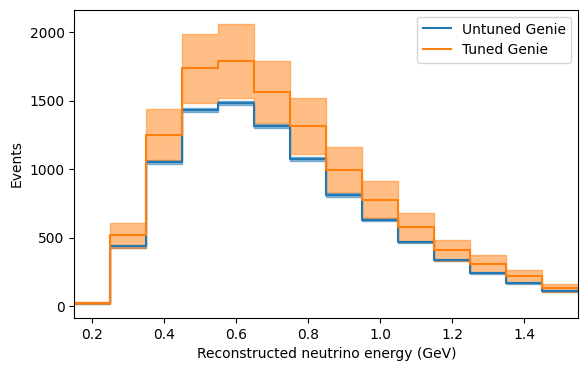

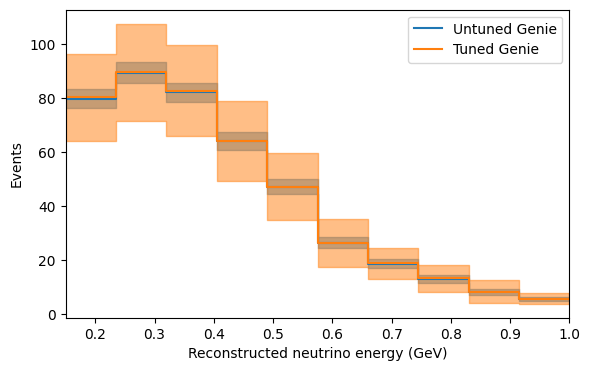

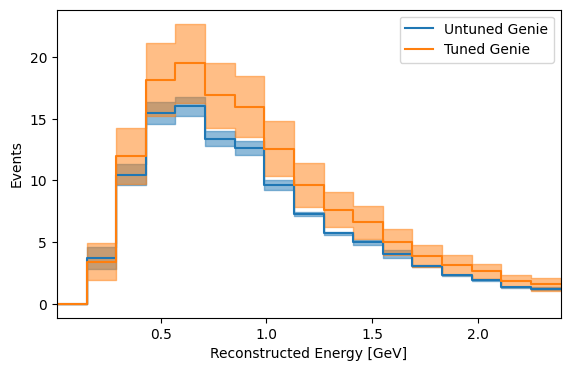

In [24]:
fig, ax = plt.subplots(figsize=(6.5, 4))
muon_generator.get_mc_hist()["NUMUCRTNP0PI"].draw(ax=ax, label="Untuned Genie")
joint_histogram_tuned_genie["NUMUCRTNP0PI"].draw(ax=ax, label="Tuned Genie")
ax.legend()

fig, ax = plt.subplots(figsize=(6.5, 4))
ncpi0_generator.get_mc_hist()["TWOSHR"].draw(ax=ax, label="Untuned Genie")
joint_histogram_tuned_genie["TWOSHR"].draw(ax=ax, label="Tuned Genie")
ax.legend()

fig, ax = plt.subplots(figsize=(6.5, 4))
signal_generator.get_mc_hist()["NPBDT"].draw(ax=ax, label="Untuned Genie")
joint_histogram_tuned_genie["NPBDT"].draw(ax=ax, label="Tuned Genie")
ax.legend()

In [25]:
from microfit.histogram import HistogramGenerator

signal_channels = ["NPBDT", "ZPBDT"]
sideband_channels = ["TWOSHR", "NUMUCRTNP0PI", "NUMUCRT0P0PI"]

hist_generators = [r.get_hist_generator(which="mc") for r in [signal_generator, ncpi0_generator, muon_generator]]

joint_histogram_untuned_genie = HistogramGenerator.generate_joint_histogram(hist_generators, include_multisim_errors=False, add_precomputed_detsys=False)
joint_histogram_untuned_genie = joint_histogram_untuned_genie[signal_channels + sideband_channels]

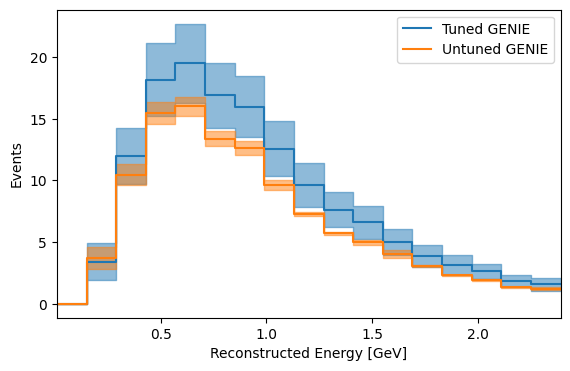

In [26]:
fig, ax = plt.subplots(figsize=(6.5, 4))
joint_histogram_tuned_genie["NPBDT"].draw(ax=ax, label="Tuned GENIE")
joint_histogram_untuned_genie["NPBDT"].draw(ax=ax, label="Untuned GENIE")

ax.legend()
plt.show()

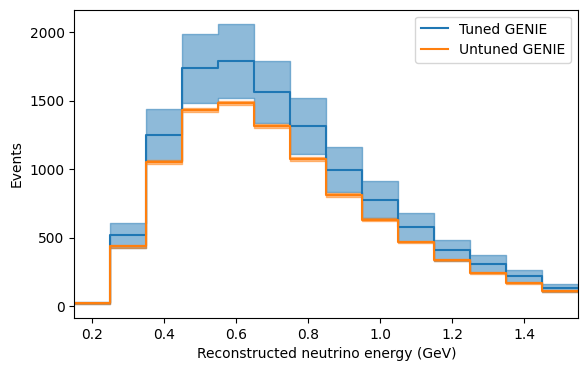

In [27]:
fig, ax = plt.subplots(figsize=(6.5, 4))
joint_histogram_tuned_genie["NUMUCRTNP0PI"].draw(ax=ax, label="Tuned GENIE")
joint_histogram_untuned_genie["NUMUCRTNP0PI"].draw(ax=ax, label="Untuned GENIE")

ax.legend()
plt.show()

In [28]:
import numpy as np

joint_histogram_tune_ratio = joint_histogram_tuned_genie.bin_counts / joint_histogram_untuned_genie.bin_counts
joint_histogram_tune_ratio[~np.isfinite(joint_histogram_tune_ratio)] = 1.0
joint_histogram_untuned_genie_with_errors = joint_histogram_tuned_genie / joint_histogram_tune_ratio

/nashome/a/atrettin/miniforge3/envs/python3LEE/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


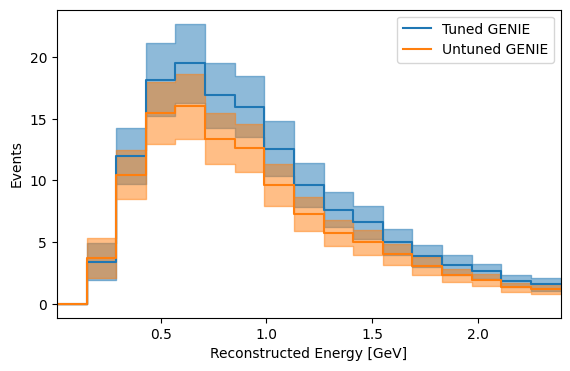

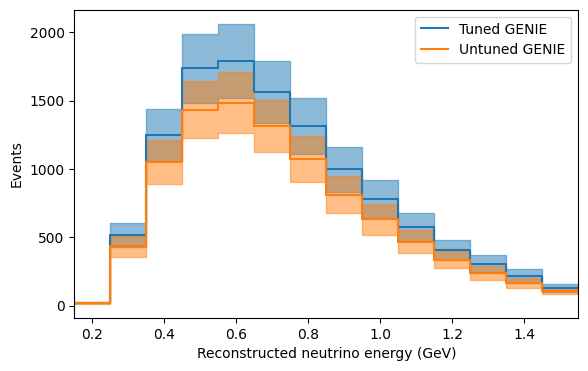

In [29]:
fig, ax = plt.subplots(figsize=(6.5, 4))
joint_histogram_tuned_genie["NPBDT"].draw(ax=ax, label="Tuned GENIE")
joint_histogram_untuned_genie_with_errors["NPBDT"].draw(ax=ax, label="Untuned GENIE")

ax.legend()

fig, ax = plt.subplots(figsize=(6.5, 4))
joint_histogram_tuned_genie["NUMUCRTNP0PI"].draw(ax=ax, label="Tuned GENIE")
joint_histogram_untuned_genie_with_errors["NUMUCRTNP0PI"].draw(ax=ax, label="Untuned GENIE")

ax.legend()
plt.show()

<AxesSubplot:title={'center':'Correlation matrix'}>

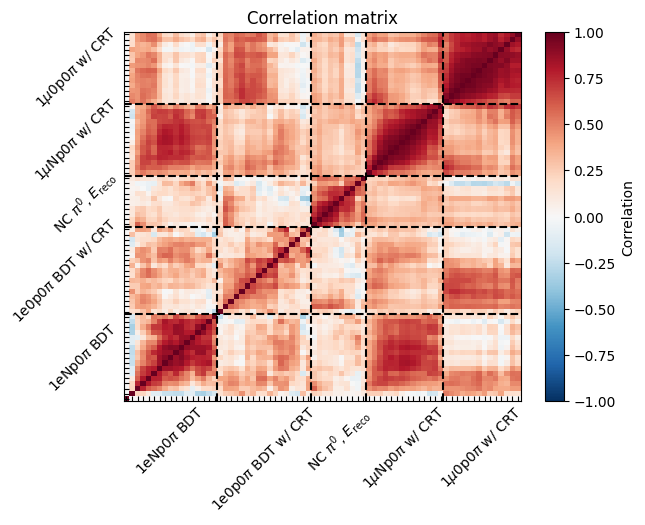

In [30]:
joint_histogram_untuned_genie_with_errors.draw_covariance_matrix()

In [31]:
joint_total_prediction_untuned_genie = joint_histogram_untuned_genie_with_errors + joint_histogram_ext
joint_total_prediction_untuned_genie_constrained = joint_total_prediction_untuned_genie.update_with_measurement(
    joint_data_histogram[sideband_channels], central_value=joint_total_prediction_untuned_genie
)

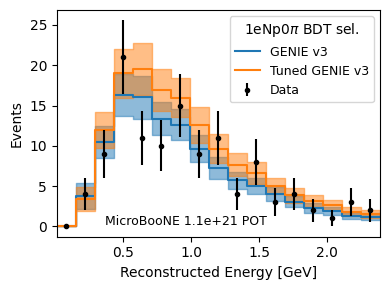

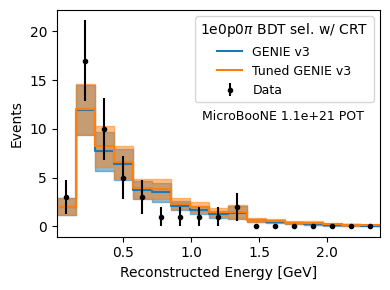

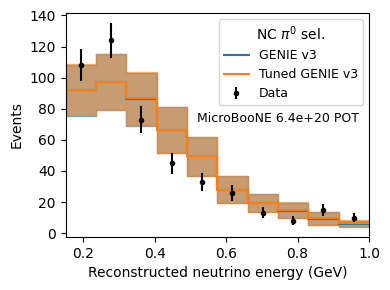

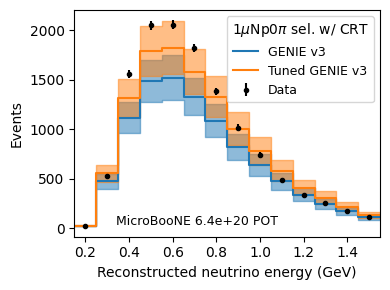

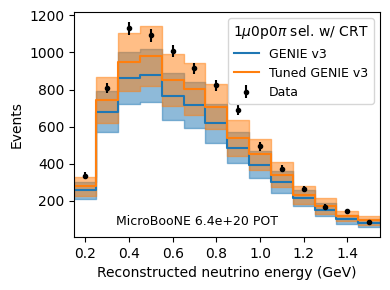

In [59]:
pot_dict = {
    "NPBDT": signal_data_pot,
    "ZPBDT": signal_data_pot,
    "TWOSHR": ncpi0_data_pot,
    "NUMUCRTNP0PI": muon_data_pot,
    "NUMUCRT0P0PI": muon_data_pot,
}

for channel in joint_total_prediction_untuned_genie.channels:
    fig, ax = plt.subplots(figsize=(4, 3))
    joint_total_prediction_untuned_genie[channel].draw(ax=ax, label="GENIE v3")
    joint_total_prediction[channel].draw(ax=ax, label="Tuned GENIE v3")
    joint_data_histogram[channel].draw(ax=ax, label="Data", as_errorbars=True, color="k")
    ax.legend(title=joint_data_histogram[channel].binning.selection_tex, fontsize=9)
    # add POT label
    text_loc = (0.4, 0.04)
    if channel in ["ZPBDT", "TWOSHR"]:
        text_loc = (0.7, 0.5)
    ax.text(text_loc[0], text_loc[1], f"MicroBooNE {pot_dict[channel]:.2g} POT", ha="center", va="bottom", transform=ax.transAxes, fontsize=9)
    fig.tight_layout()
    plt.savefig(f"untuned_genie_study_plots/{channel}_pre_constraint_with_errors.pdf")

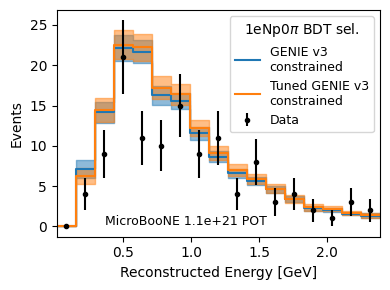

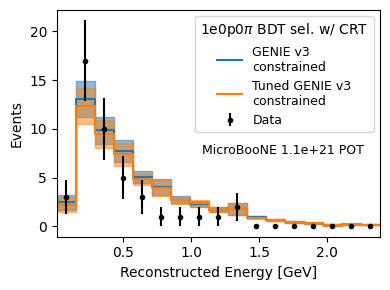

In [62]:
for channel in joint_total_prediction_untuned_genie_constrained.channels:
    fig, ax = plt.subplots(figsize=(4, 3))
    joint_total_prediction_untuned_genie_constrained[channel].draw(ax=ax, label="GENIE v3\nconstrained")
    joint_total_prediction_constrained[channel].draw(ax=ax, label="Tuned GENIE v3\nconstrained")
    joint_data_histogram[channel].draw(ax=ax, label="Data", as_errorbars=True, color="k")
    ax.legend(title=joint_data_histogram[channel].binning.selection_tex, fontsize=9)
    # add POT label
    text_loc = (0.4, 0.04)
    if channel in ["ZPBDT", "TWOSHR"]:
        text_loc = (0.7, 0.35)
    ax.text(text_loc[0], text_loc[1], f"MicroBooNE {pot_dict[channel]:.2g} POT", ha="center", va="bottom", transform=ax.transAxes, fontsize=9)
    fig.tight_layout()
    plt.savefig(f"untuned_genie_study_plots/{channel}_post_constraint_with_errors.pdf")